## DATA ANALYSIS: HAPPINESS DETERMINANTS PER COUNTRY - 2023##

The 2023 data resulted from the merger of the 3 csv files below:

1. Crime.csv (Crime Rate by Country 2023 retrieved from https://worldpopulationreview.com/country-rankings/crime-rate-by-country),
2. Happiness.csv (World Happiness Report 2023 retrieved from https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023), and 
3. Freedom.csv (2023 Heritage Foundation Economic Freedom data retrieved from https://www.heritage.org/index/explore?view=by-region-country-year&countryids=&regionids=&yearids=24). 

The .csv files were imported into SQL where the data was housed and merged to produce one database and a corresponding.csv file with 111 unique records: Happiness_Factors.sql and Happiness_Factors.csv

The analysis consisted of Scatterplots, Multivariate Regressions, and Interactive Bar Charts using the following variables:

* y variable: Happiness Score

* x variables: GDP per Capita, Social Support, Healthy Life Expectancy, Corruption, Freedom_Score, Property_Rights, Government_Spending, Business, Trade, and Crime_Index

### DATA SETUP###


In [1]:
# Import Dependencies
import csv
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
# Read the CSV file and create pandas dataframe
df = pd.read_csv('Happiness_Factors.csv')

# Print the dataframe
df.head()


,Country,Happiness_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Corruption,Id,Freedom_Score,Property_Rights,Government_Spending,Business,Trade,Investment,rank,Crime_Index,Population
0,Afghanistan,1.859,7.324,0.341,54.712,0.847,1,0.0,5.8,0.0,34.6,0.0,0.0,4,76,42239854
1,Albania,5.277,9.567,0.718,69.150,0.878,2,65.3,55.9,71.0,70.7,82.8,70.0,78,43,2832439
2,Algeria,5.329,9.300,0.855,66.549,0.717,3,43.2,27.8,50.7,53.6,57.5,30.0,43,52,45606480
3,Argentina,6.024,9.959,0.891,67.200,0.814,5,51.0,34.6,53.9,55.5,61.2,55.0,18,64,45773884
4,Armenia,5.342,9.615,0.790,67.789,0.705,6,65.1,50.3,76.3,64.9,73.6,75.0,127,23,2777970


#### The link below leads to a Github page with a Line Graph of Happiness Scores by Country:####
https://jcndongo.github.io/happinessline.github.io/Happiness_LINE_index.html

### SCATTERPLOTS###

<center>The Section Below uses Scatterplots to Illustrate the Impact of GDP per Capita, Social Support, Healthy Life Expectancy, Corruption, Freedom_Score, Property_Rights, Government_Spending, Business, Trade, and Crime_Index on Happiness Scores</center>

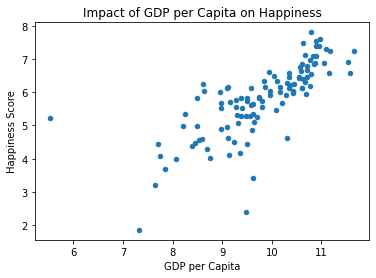

In [3]:
# Create a scatter plot: Happiness & GDP per Capita
df.plot.scatter(x='GDP_per_capita', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Impact of GDP per Capita on Happiness')

# Display the plot
plt.show()

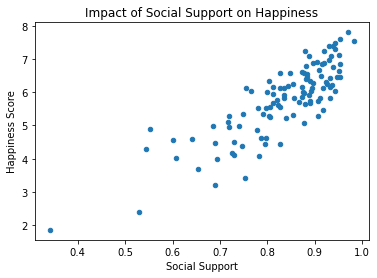

In [4]:
# Create a scatter plot: Happiness & Social Support
df.plot.scatter(x='Social_support', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Impact of Social Support on Happiness')

# Display the plot
plt.show()

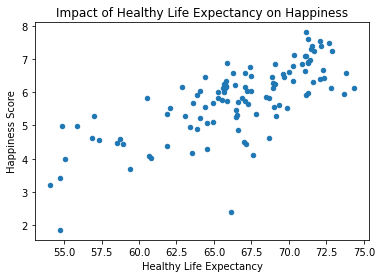

In [5]:
# Create a scatter plot: Happiness & Healthy Life Expectancy
df.plot.scatter(x='Healthy_life_expectancy', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Impact of Healthy Life Expectancy on Happiness')

# Display the plot
plt.show()

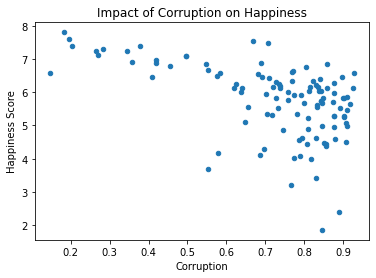

In [6]:
# Create a scatter plot: Happiness & Corruption
df.plot.scatter(x='Corruption', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Corruption')
plt.ylabel('Happiness Score')
plt.title('Impact of Corruption on Happiness')

# Display the plot
plt.show()

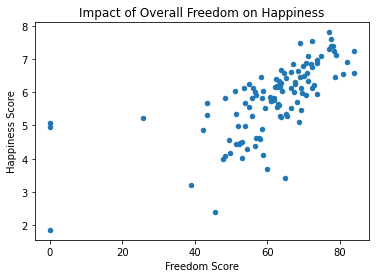

In [7]:
# Create a scatter plot: Happiness & Overall Freedom 

df.plot.scatter(x='Freedom_Score', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Freedom Score')
plt.ylabel('Happiness Score')
plt.title('Impact of Overall Freedom on Happiness')

# Display the plot
plt.show()

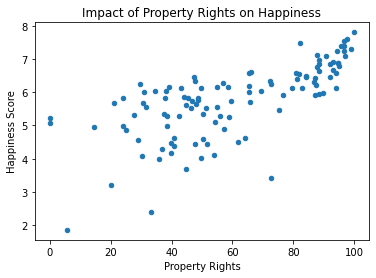

In [8]:
# Create a scatter plot: Happiness & Property Rights 

df.plot.scatter(x='Property_Rights', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Property Rights')
plt.ylabel('Happiness Score')
plt.title('Impact of Property Rights on Happiness')

# Display the plot
plt.show()

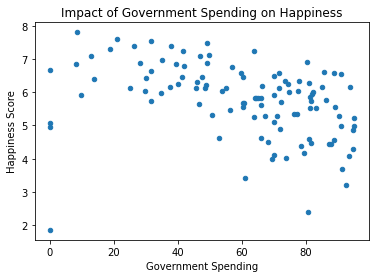

In [9]:
# Create a scatter plot: Happiness & Government Spending 

df.plot.scatter(x='Government_Spending', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Government Spending')
plt.ylabel('Happiness Score')
plt.title('Impact of Government Spending on Happiness')

# Display the plot
plt.show()

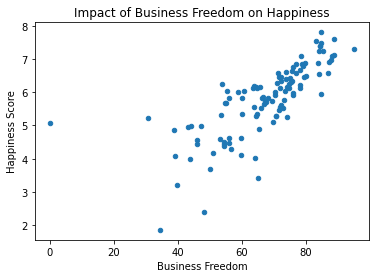

In [10]:
# Create a scatter plot: Happiness & Business Freedom 

df.plot.scatter(x='Business', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Business Freedom')
plt.ylabel('Happiness Score')
plt.title('Impact of Business Freedom on Happiness')

# Display the plot
plt.show()

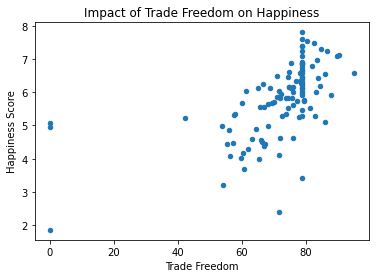

In [11]:
# Create a scatter plot: Happiness & Trade Freedom 

df.plot.scatter(x='Trade', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Trade Freedom')
plt.ylabel('Happiness Score')
plt.title('Impact of Trade Freedom on Happiness')

# Display the plot
plt.show()

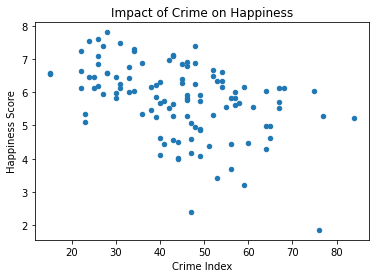

In [12]:
# Create a scatter plot: Happiness & Crime 

df.plot.scatter(x='Crime_Index', y='Happiness_Score')

# Set the axis labels and plot title
plt.xlabel('Crime Index')
plt.ylabel('Happiness Score')
plt.title('Impact of Crime on Happiness')

# Display the plot
plt.show()

### MULTIVARIATE REGRESSION ANALYSIS###

<center>The Section below represents a multivariate regression analysis of the Impact of GDP per Capita, Social Support, Healthy Life Expectancy, Corruption, Freedom_Score, Property_Rights, Government_Spending, Business, Trade, Investment, Crime_Index, and Population on Happiness Scores</center>

In [13]:
# Regression analysis to test model

# Define the dependent variable (y) and independent variables (x)
y = df['Happiness_Score']
x = df[['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Corruption', 'Freedom_Score', 'Property_Rights', 'Government_Spending', 'Business', 'Trade', 'Investment', 'Crime_Index', 'Population']]

# Add a constant term to the independent variables
x = sm.add_constant(x)

# Perform the multivariate regression analysis
model = sm.OLS(y, x).fit()

# Print the summary statistics of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     46.23
Date:                Tue, 30 May 2023   Prob (F-statistic):           6.33e-35
Time:                        16:42:50   Log-Likelihood:                -61.850
No. Observations:                 111   AIC:                             149.7
Df Residuals:                      98   BIC:                             184.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

CONCLUSION: based on the model above, social support, corruption, business freedom, and trade freedom are the only statistically significant determinants of happiness for all the countries in our dataset.

### TABLES & INTERACTIVE BAR CHARTS: Social Support and Corruption###

#### Bottom 6 - The table illustrates the Bottom 6 Countries based on Happiness Score and the link leads to a Github page with an interactive bar chart of social support and corruption for those countries:####
https://jcndongo.github.io/bottom6countries.github.io/BOTTOM6_index.html

In [14]:
# Print df by ascending Happiness Score - Least Happy
Bottom6 = df.sort_values('Happiness_Score', ascending=True)

# Print the sorted dataframe
Bottom6.head(6)

,Country,Happiness_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Corruption,Id,Freedom_Score,Property_Rights,Government_Spending,Business,Trade,Investment,rank,Crime_Index,Population
0,Afghanistan,1.859,7.324,0.341,54.712,0.847,1,0.0,5.8,0.0,34.6,0.0,0.0,4,76,42239854
57,Lebanon,2.392,9.478,0.530,66.149,0.891,93,45.6,33.1,80.7,48.1,71.4,30.0,60,47,5353930
110,Zimbabwe,3.204,7.641,0.690,54.050,0.766,183,39.0,20.0,92.6,39.8,54.0,25.0,25,59,16665409
12,Botswana,3.435,9.629,0.753,54.725,0.830,21,64.9,72.8,61.1,65.2,78.6,65.0,42,53,2675352
96,Tanzania,3.694,7.857,0.653,59.401,0.554,162,60.0,44.8,91.3,50.1,60.6,55.0,35,56,67438106
109,Zambia,3.982,8.074,0.694,55.032,0.818,182,47.8,36.0,69.6,43.9,65.2,55.0,74,44,20569737


#### Top 6 - The table illustrates the Top 6 Countries based on Happiness Score and the link leads to a Github page with an interactive bar chart of social support and corruption for those countries:####
https://jcndongo.github.io/top6countries.github.io/TOP6_index.html

In [15]:
# Print df by descending Happiness Score - Most Happy
Top6 = df.sort_values('Happiness_Score', ascending=False)

# Print the sorted dataframe
Top6.head(6)

,Country,Happiness_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Corruption,Id,Freedom_Score,Property_Rights,Government_Spending,Business,Trade,Investment,rank,Crime_Index,Population
32,Finland,7.804,10.792,0.969,71.150,0.182,57,77.1,100.0,8.5,84.9,78.6,85.0,114,28,5545475
25,Denmark,7.586,10.962,0.954,71.250,0.196,45,77.6,97.5,20.9,89.0,78.6,90.0,117,26,5910913
41,Iceland,7.530,10.896,0.983,72.050,0.668,73,72.2,96.8,31.5,83.3,80.4,80.0,124,24,375318
47,Israel,7.473,10.639,0.943,72.697,0.708,79,68.9,82.3,49.1,84.9,82.6,80.0,104,31,9174520
71,Netherlands,7.403,10.942,0.930,71.550,0.379,119,78.0,95.6,37.9,84.4,78.6,90.0,115,27,17618299
93,Sweden,7.395,10.883,0.939,72.150,0.202,157,77.5,96.6,26.2,84.6,78.6,85.0,54,48,10612086
